## Estudio del dataset

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 15)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Primeramente realizamos los imports que nos serán necesarios durante el estudio del dataset y además ajustamos algunas de las opciones tanto de panas, de matplotlib, como del notebook para que la visualización de los datos sea más cómoda.

In [8]:
originalDF = pd.read_csv('./Database/Concrete_Data_Yeh.csv', header=0, delimiter=',')

Cragamos el dataset en un dataframe de pandas usando la función para leer archivos .csv y nombramos la variable como "originalDF" ya que como realizaremos modificaciones sobre los datos nos interesa simepre tener disponible el original para poder usar esos datos sin modificar si fuera encesario.

In [12]:
originalDF.head()
originalDF.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28,44.280
1026,322.200,0.000,115.600,196.000,10.400,817.900,813.400,28,31.180
1027,148.500,139.400,108.600,192.700,6.100,892.400,780.000,28,23.700
1028,159.100,186.700,0.000,175.600,11.300,989.600,788.900,28,32.770
1029,260.900,100.500,78.300,200.600,8.600,864.500,761.500,28,32.400


Mostraos tanto los primeros 5 registros como los 5 últimos disponibles en nuestro dataset. De esta manera también vemos que disponemos de 1030 registros y un total de 9 variables.  
En la página de Kaggle del dataset (https://www.kaggle.com/maajdl/yeh-concret-data) ya está indicado, pero es evidente que nuestra variable objetivo será "csMPa". Esto hace referéncia a la fuerza compresiva del hormigón y, por tanto, es la variables más iteresante de intentar predecir.  
En la página de Kaggle se nos indica que absolutamente todos los valores, exceptuando "age" y "csMPa", usan las unidades kg/m3. En cuanto a "age" se encuentra en días (de 1 a 365) y en el caso de "csMPa", como es de suponer, se encuentra en megapascales (MPa).

In [22]:
originalDF.describe()
originalDF.isnull().sum()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

Usando el método "describe" de pandas obtenemos rápidamente una descripción estadística de cada una de las variables que forman nuestro dataset. También podemos ver que ninguna de las variables tiene valores nulos, lo cuál nunca está de más.  
Sin embargo, observamos también que los datos siguen escalas distintas, por lo tanto, sería conveniente que los normalizaramos antes de seguir adelante pero antes de ello, visualizemos que distribución tienen las variables ya que parece haber anomalías si nos fijamos en los cuartiles de 'slag', 'flyash' y 'superplasticizer' en especial.

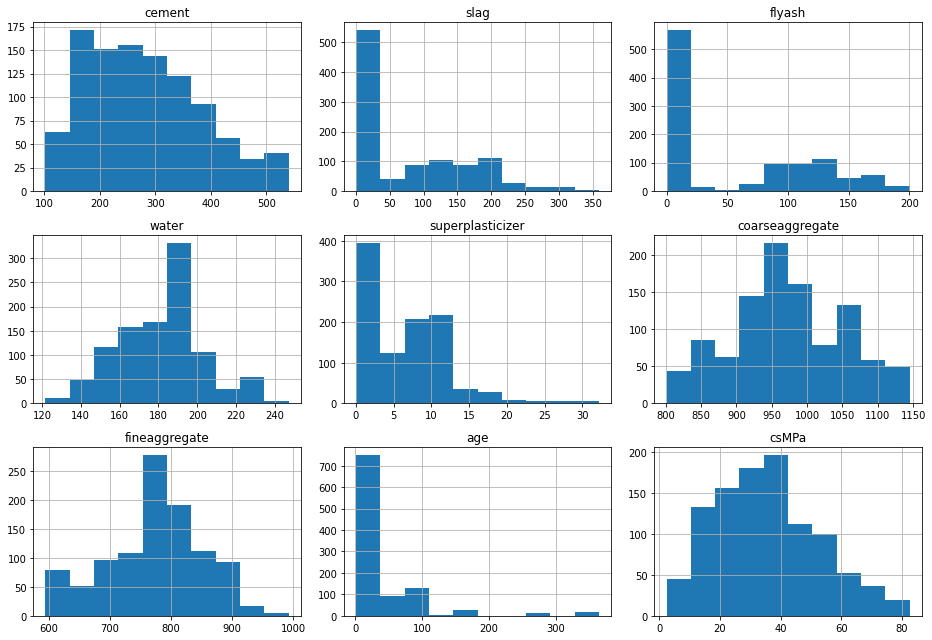

In [46]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(originalDF.columns[varIdx])
        originalDF[originalDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

Como suponíamos, hay un problema con las variables 'slag', 'flyash' y 'superplastizicer', además de 'age'. Estas variables acumulan muchos registros en el valor 0 y eso hace que no sigan una distribución beneficiosa para nuestro futuro modelo.  
Eso es así, seguramente, porque en muchas de las mezclas de hormigón simplemente no se añaden esos elementos y eso provoca estas distribuciones tan desbalanceadas.

# HASTA AQUÍ TODO GUAYS

In [73]:
from sklearn.preprocessing import RobustScaler
print(np.sqrt(originalDF))
originalDF.head()
rScaler = RobustScaler(with_scaling=True)
scaledDF = pd.DataFrame(rScaler.fit_transform(np.sqrt(originalDF))
scaledDF.columns = originalDF.columns
scaledDF.hist();

SyntaxError: invalid syntax (<ipython-input-73-e3db12206bf4>, line 6)